In [26]:
from qiskit import *

In [27]:
qr = QuantumRegister(2) #quantum register of 2 bits

In [28]:
cr = ClassicalRegister(2) #classical register of 2 bits

In [29]:
circuit = QuantumCircuit(qr,cr)

In [30]:
%matplotlib inline
circuit.draw()

q5_0: 
      
q5_1: 
      
c3: 2/

In [31]:
circuit.h(qr[0]) # Add a H gate on qubit 0, putting this qubit in superposition.

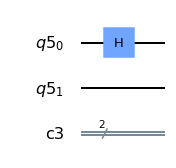

In [32]:
circuit.draw(output='mpl')

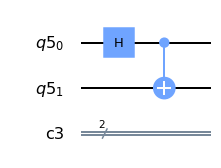

In [33]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting

circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

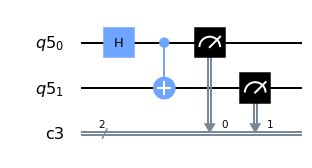

In [34]:
circuit.measure(qr, cr) # qubits are measured and results are stored in classical bits in order
circuit.draw(output='mpl')

# Running on a simulator

### We begin by setting the simulator to qasm_simulator from the Aer element of Qiskit.

In [35]:
simulator = Aer.get_backend('qasm_simulator')

In [36]:
result = execute(circuit, backend=simulator).result()

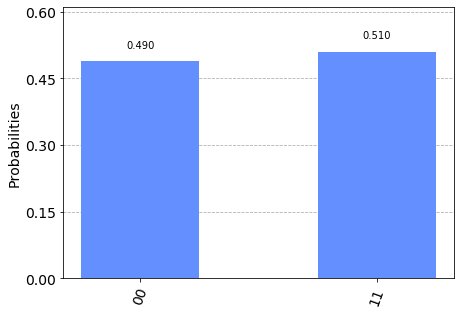

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware


In [38]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

C:\Users\shiva teja\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [39]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_athens


In [40]:
qcomp = provider.get_backend('ibmq_athens')

In [41]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [42]:
job = execute(circuit, backend=qcomp)

In [43]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


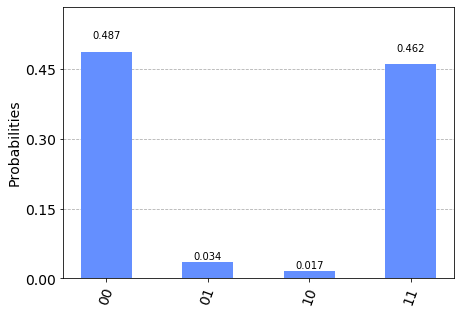

In [44]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [45]:
%qiskit_disable_job_watcher

In [47]:
from qiskit.tools.monitor import backend_overview
backend_overview()

ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 13             Pending Jobs: 2              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      149.3          Avg. T1:      70.6           Avg. T1:      150.5
Avg. T2:      139.2          Avg. T2:      89.2           Avg. T2:      177.1



ibmq_valencia                ibmq_ourense                 ibmq_vigo
-------------                ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 50             Pending Jobs: 449            Pending Jobs: 476
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operat

In [48]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_athens
